In [1]:
from textblob import TextBlob
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('../data/dataHasilPreprocessing/hasilPreprocessing1.csv')
df

,Ulasan,Sentimen
0,ulas,Negatif
1,NaN,Negatif
2,bahan aja warna navy nya beda,Negatif
3,kasih catat order warna kuning navy baca kirim...,Negatif
4,kecil,Negatif
...,...,...
990,barang selamat terima kasih bahan celana nya s...,Negatif
991,kecil,Negatif
992,pesan cuna barang rusak coba konfirmasi tanggap,Negatif
993,karet pinggang nya kencang,Negatif


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ulasan    983 non-null    object
 1   Sentimen  995 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [4]:
df = df.drop_duplicates(subset=['Ulasan'])

In [5]:
df = df.dropna()

In [6]:
tb_counts = df.Sentimen.value_counts()
tb_counts

Sentimen
Positif    812
Negatif    135
Name: count, dtype: int64

<Axes: title={'center': 'Sentiment Analysis'}, xlabel='Sentimen', ylabel='Jumlah Tweet'>

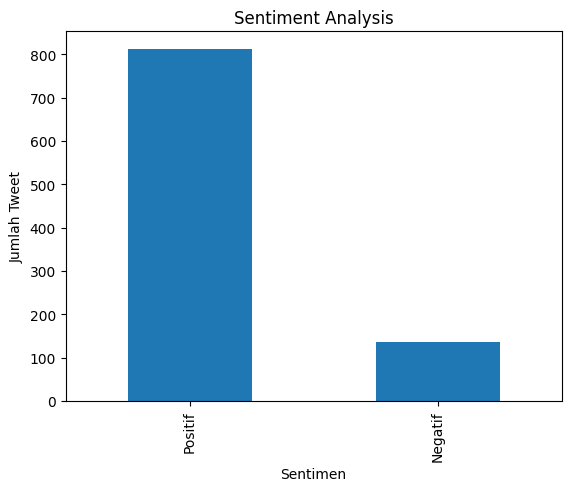

In [8]:
df['Sentimen'].value_counts().plot(kind='bar', title='Sentiment Analysis', xlabel='Sentimen', ylabel='Jumlah Tweet')

In [9]:
df.count()

Ulasan      947
Sentimen    947
dtype: int64

In [10]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [11]:
clf1 = SVC(kernel='linear')

In [12]:
X=df.Ulasan
y=df.Sentimen

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [14]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 757
Banyak data x_test  : 190
Banyak data y_train : 757
Banyak data y_test  : 190


In [15]:
model= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])

In [16]:
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [17]:
hasil=model.predict(x_test)

In [18]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

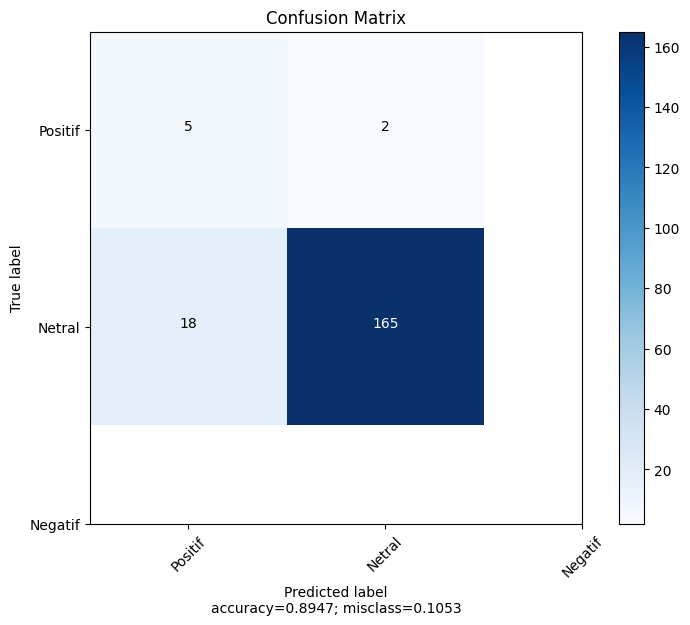

In [19]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test),
                      normalize    = False,
                      target_names = ['Positif', 'Netral', 'Negatif'],
                      title        = "Confusion Matrix")

In [20]:
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     Negatif       0.71      0.22      0.33        23
     Positif       0.90      0.99      0.94       167

    accuracy                           0.89       190
   macro avg       0.81      0.60      0.64       190
weighted avg       0.88      0.89      0.87       190

